In [1]:
%pylab inline
import scipy.integrate

Populating the interactive namespace from numpy and matplotlib


# Вариант Ньютона-Котеса

Рассматривается функция $$f(x) \ = \ 2.7cos(3.5x)e^{-\frac{7}{3}x} \ + \ 4.4sin(2.5x)e^{\frac{5}{3}x} \ + \ 2$$

Вычисляется интеграл $$\int_{a}^{b} \frac{f(x)}{(x - a)^\alpha (b - x)^\beta} dx$$

При заданных параметрах $$a = 2.8, \ b = 4.3, \ \alpha = 0, \ \beta = \frac{3}{7} $$

То есть
$$\int_{2.8}^{4.3} \frac{f(x)}{(4.3 - x)^\frac{3}{7}} dx$$

## 1. ИКФ по трём равноотстоящим узлам
Рассматривается весовая функция $$p(x) = (x - a)^{-\alpha} (b - x)^{-\beta} = (4.3 - x)^{-\frac{3}{7}}$$
Равноотстоящие узлы $$x_1 = a = 2.8, \ x_2 = \frac{a + b}{2} = 3.55, \ x_3 = b = 4.3$$


In [2]:
x_1 = a = 2.8
x_3 = b = 4.3
x_2 = (a + b) / 2
alpha, beta = 0, 3 / 7
n = 3
f = lambda x: 2.7*cos(3.5*x)*(e**((-7/3)*x)) + 4.4*sin(2.5*x)*(e**((5/3)*x)) + 2
p = lambda x: (b - x)**(-beta)
x_1, x_2, x_3

(2.8, 3.55, 4.3)

Вычисляются моменты весовой функции $$\mu_j \ = \int_{a}^{b} p(x)x^j dx, \ j \ = \ 0,1,\ldots,\ n - 1$$
То есть $$\mu_j = \int_{2.8}^{4.3} (4.3 - x)^{-\frac{3}{7}} x^j dx, \ j \ = \ 0,1,2$$

In [3]:
mu = zeros(n)
for j in arange(n):
    mu[j] = scipy.integrate.quad(lambda x: (x**j)*p(x), a, b)[0]
mu

array([  2.20628507,   8.28359757,  31.54787073])

$$\mu_0 = 2.20628507, \ \mu_1 = 8.28359757, \ \mu_2 = 31.54787073$$
Решается система $$\sum\limits_{j=1}^n A_j x_j^s \ = \ \mu_s, \ s \ = \ 0, 1,\ldots,n-1$$
В нашем случае $$\begin{pmatrix} 1 & 1 & 1 \\ x_1 & x_2 & x_3 \\ x_1^2 & x_2^2 & x_3^2 \end{pmatrix} \begin{pmatrix} A_1 \\ A_2 \\ A_3 \end{pmatrix} = \begin{pmatrix} \mu_0 \\ \mu_1 \\ \mu_2 \end{pmatrix}$$


In [4]:
X = array([[1, 1, 1], [x_1, x_2, x_3], [x_1**2, x_2**2, x_3**2]])
A = linalg.solve(X, mu)
A

array([ 0.17828566,  1.24799963,  0.77999977])

Таким образом $$A_1 = 0.17828566, \ A_2 = 1.24799963, \ A_3 = 0.77999977$$
Считается квадратурная сумма $$S = \sum\limits_{j=1}^n A_j \ f(x_j)$$

In [5]:
F = f(array([x_1, x_2, x_3])) 
S = A.dot(F)
S

-3188.6589881082191

$$S = -3188.6589881062437$$
Вычисляется "точное" значение интеграла

In [6]:
precise = scipy.integrate.quad(lambda x: f(x) / (4.3 - x)**(3/7), 2.8, 4.3)[0] 
precise

-3246.87592632744

$$P = -3246.87592632744$$
"точная погрешность":

In [7]:
abs(S - precise)

58.216938219220992

$$\epsilon = 58.216938221196415$$
Оценим методическую погрешность $$R_n \leq \frac{M_n}{n!} \int_{a}^{b} \lvert p(x)\omega(x) \rvert dx$$
$$M_n \ : \ \lvert f^{(n)}(x) \rvert \leq M_n \ на \ [a, b]$$
$$\omega (x) = (x - x_1)(x - x_2)\cdot \ldots \cdot (x - x_n)$$
Напомним, что $n = 3$

In [8]:
from sympy import *
init_printing(use_unicode=True)

In [9]:
x = Symbol('x')
sympy_f = Function('f')(x)
sympy_f = 2.7*cos(3.5*x)*exp((-7/3)*x) + 4.4*sin(2.5*x)*exp((5/3)*x) + 2
dnf = diff(sympy_f, x, n)

Посмотрим на график $ \ \ f^{(n)}(x), \ на \ [a, b]$

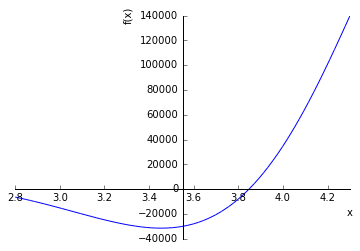

In [10]:
plot(dnf, (x, a, b))

Отсюда, можно взять в качестве $M_n$ значение $f^{(n)}(x)$ в точке $x=b=4.3$

In [11]:
np_dnf = lambdify(x, dnf)
M_n = np_dnf(b)
M_n

In [12]:
beta = 3 / 7
omega = lambda x: (x - x_1) * (x - x_2) * (x - x_3)
R_n_max = (M_n / 6) * scipy.integrate.quad(lambda x: abs(p(x) * omega(x)), a, b)[0]
R_n_max

Получается, что методическую погрешность для данного метода можем оценить только таким образом $$R_n \ \leq \ 4973.257129901817, \ ну \ и \ \epsilon \leq R_n$$

## 2. Построение составной КФ

Интервал интегрирования $[a, b]$ разбивается на $k$ отрезков длиной $h = \frac{b \ - \ a}{k} \ : \ [z_{i-1}, z_i], \ i = 1, \ldots, k$.
Соответственно, $z_i = a + ih, \ i = 0, \ldots, k$.

На каждом отрезке $[z_{i-1}, z_i], \ i = 1, \ldots, k$ применяется малая ИКФ по трём равноотстоящим узлам.

Результаты применения малой ИКФ по всем отрезкам суммируются.

In [13]:
# подготовительные процедуры - переинициализация
%pylab inline
import scipy.integrate
alpha, beta = 0, 3 / 7
a, b = 2.8, 4.3
f = lambda x: 2.7*cos(3.5*x)*(e**((-7/3)*x)) + 4.4*sin(2.5*x)*(e**((5/3)*x)) + 2
p = lambda x: (b - x)**(-beta)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
# малая трёхточечная ИКФ
def little_interpolation_sum(a, b):
    n = 3
    x_1, x_2, x_3 = a, (a + b) / 2, b
    mu = zeros(n)
    for j in arange(n):
        mu[j] = scipy.integrate.quad(lambda x: (x**j)*p(x), a, b)[0]
    X = array([[1, 1, 1], [x_1, x_2, x_3], [x_1**2, x_2**2, x_3**2]])
    A = linalg.solve(X, mu)
    F = f(array([x_1, x_2, x_3])) 
    S = A.dot(F)
    return S

In [15]:
# деление интервала интегрирования на k отрезков
def interval_partition(a, b, k):
    h = (b - a) / k
    return array([(a + i * h) for i in range(0, int(k) + 1)])

In [16]:
# деление интервала
def complex_quad_formula(a, b, k):
    parts = interval_partition(a, b, k)
    s = 0
    for i in range(0, k):
        s += little_interpolation_sum(parts[i], parts[i + 1])
    return s

В качестве примера, применим составную ИКФ с 10 отрезками

In [17]:
c_q = complex_quad_formula(a, b, 10)
c_q, precise, abs(c_q - precise)

Последнее число - "точная погрешность" показывает, что результат однозначно лучше, чем в предыдущем пункте. Но нам требуется добиться точности в $\epsilon \ = \ 10^{-6}$

Ну, например:

In [18]:
c_q = complex_quad_formula(a, b, 911)
c_q, precise, abs(c_q - precise)

Реализуем правило Эйткена для оценки скорости сходимости метода и выбора оптимального числа отрезков разбиения:

In [19]:
def aitken(accuracy, a, b):
    q, H_1 = 2, 2
    H_2 = H_1 * q
    H_3 = H_2 * q
    S_H_1, S_H_2, S_H_3 = complex_quad_formula(a, b, H_1), complex_quad_formula(a, b, H_2), complex_quad_formula(a, b, H_3)
    S = array([S_H_1, S_H_2, S_H_3])
    m = 0
    m_next = log(abs((S_H_1 - S_H_2) / (S_H_2 - S_H_3))) / log(q)
    cnt = 1
    while (abs(m - m_next) > accuracy):
        H_2 = H_3
        H_3 = H_3 * q
        S_H_1 = S_H_2
        S_H_2 = S_H_3
        S_H_3 = complex_quad_formula(a, b, H_3)
        S = array(S.tolist() + [S_H_3])
        m = m_next
        m_next = log(abs((S_H_1 - S_H_2) / (S_H_2 - S_H_3))) / log(q)
        cnt += 1
    H = H_2
    return m_next, H, S

In [20]:
aitken(0.02, a, b)

(3.4847453216693274,
 128,
 array([-3196.73094537, -3239.44554994, -3246.04716774, -3246.79390187,
        -3246.86828022, -3246.87523915, -3246.87586513, -3246.87592105]))

К сожалению, при попытке достичь точности, большей, чем $0,02$, процесс выполняется очень долго (ни разу не смог зафиксировать окончание процесса)

In [21]:
SS = complex_quad_formula(a, b, 128)
SS, precise, abs(SS - precise)

Реализуем метод Ричардсона для оценки методической погрешности

In [22]:
def richardson(accuracy, a, b):
    m, H, s = aitken(0.02, a, b)
    len_H = abs(a - b) / H
    Hstack = array([2 * len_H, len_H])
    A = array([[1, -(len_H * 2)**m], [1, -len_H **m]])
    B = array([s[len(s) - 4], s[len(s) - 3]])
    x = linalg.solve(A, B)
    cnt = 2
    while(x[-1] * (Hstack[-1]**m) > accuracy):
        cnt = cnt - 1
        H = H * 2
        len_H = abs(a - b) / H
        Hstack = array(Hstack.tolist() + [len_H])
        if cnt >= 1:
            B = array(B.tolist() + [s[len(s) - cnt - 1]])
        else:
            B = array(B.tolist() + [complex_quad_formula(a, b, H)])
        L = len(A)
        A = zeros((L + 1, L + 1))
        for i in range(0, L + 1):
            A[i][0] = 1
        for i in range(0, L):
            for j in range(1, L + 1):
                A[i][j] = -(Hstack[i]**(m + (j - 1)))
        x = linalg.solve(A, B)
    dim = len(A)
    intt = B[-1]
    return dim, intt, m

In [23]:
richardson(1e-6, a, b)